<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>Import data</h3>
<p>
You can find the dataset from the following link: <a href=" https://1824251045.rsc.cdn77.org/web/algohouse/data/XRPBUSD_trades_1m.csv"> https://1824251045.rsc.cdn77.org/web/algohouse/data/XRPBUSD_trades_1m.csv</a>. 
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


You are running the lab in your  browser, so we will install the libraries using `piplite`:


In [54]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['scikit-learn'])

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:

In [19]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#! mamba install scikit-learn


In [20]:
import pandas as pd
import numpy as np
import scipy as sc
import random
import string
import sklearn.metrics
import matplotlib.pylab as plt

This function will download the dataset into your browser:


In [21]:
#This function will download the dataset into your browser 
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/corsera_da0101en_notebook_bottom?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [22]:
path = "https://1824251045.rsc.cdn77.org/web/algohouse/data/XRPBUSD_trades_1m.csv"

You will need to download the dataset; if you are running locally, please comment out the following.

In [23]:
await download(path, "XRPBUSD_trades_1m.csv")
path="XRPBUSD_trades_1m.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  <code>index_col=0</code> in order to use the first line of cvs file as the row labels of the dataframe.

In [24]:
df = pd.read_csv(path, index_col=0)

In finance you sometimes need to use different numbers of decimal places. For ease of reading, let's specify the value of the precision parameter equal to 3 to display three decimal signs (instead of 6 as default).

In [25]:
pd.set_option("display.precision", 3)

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [26]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,0.370,0.370,0.368,0.368,165726.4,47,0.369
1,2022-11-11 14:39:00,0.368,0.369,0.367,0.368,235942.4,49,0.368
2,2022-11-11 14:40:00,0.368,0.368,0.367,0.367,475118.5,46,0.367
3,2022-11-11 14:41:00,0.367,0.369,0.367,0.368,420195.5,53,0.368
4,2022-11-11 14:42:00,0.368,0.369,0.367,0.367,199091.6,42,0.368


<h2 id="Generating_missing_values">Generating missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>

One of the important steps of data wrangling is identifying gaps or empty cells in data and either filling or removing them. 
<p>
Let's find out if our dataset has fields with missing values. Use method <code>is.null()</code> to detect missing values. The output is a boolean value indicating whether the value is in fact missing data. <strong>False</strong> means the cell is not empty, <strong>True</strong> indicates missing value.
</p>

In [27]:
missing_data = df.isnull()
missing_data.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


After that use <code>values_counts()</code> to return a series containing counts of unique rows in the dataframe.

In [28]:
missing_data.value_counts()

ts     open   high   low    close  volume  rec_count  avg_price
False  False  False  False  False  False   False      False        66911
dtype: int64

As we can see each column of our dataframe has only boolean **False** value that indicates no missing values are present in our dataset. 

<p>
To gain a better experience of each steps of data wrangling process let's generate missing values in our dataset. Then we will try to restore them and compare with a real data.
</p>

<h3 id="generating_incorrect_data">Generating incorrect data</h3>

Undeniably, missing data is not the only incorrect data that may occur in datasets. Let us generate the following incorrect data within our dataset:
<li> missing values (NaN) </li>
<li> negative values </li>
<li> strings </li>
<br>
<p>
We should declare function <code>generate_incorrect_data()</code> responsible of this task.
</p>
<p>
In order to generate random values, the <code>rand()</code> method of random module and numpy <code>where()</code> function will be used.
</p>    
<p>
Here we use the function: 
 <pre>numpy.where(condition, [x, y, ])</pre>
to return elements chosen from x or y depending on condition.
</p>
<p>
    In our instance specify a condition <code>np.random.rand(len(df))</code> greater than 0.07 to generate part of the incorrect dataset data. If condition equals True, then yield x, otherwise yield incorrect data such as NaN, strings, and negative values.
</p>
<p>
    To generate negative values we use <code>np.random.uniform(low, high)</code> that draws samples from a uniform distribution over <code>[low, high)</code> interval.</code>
</p>
<p>
    To generate strings we use <code>random.choices(array, k)</code> to create a random sample from a given array. In our case we specify array as ASCII letters <i>string.ascii_letters</i> and create sequences of letters with a length of 7 characters <i>k=7</i>. As the <code>choices()</code> method returns a list with the randomly selected element from the specified array, we need to convert it to <i>string</i> type. To accomplish this we use the <code>string.join()</code> method that takes all items in an iterable and joins them into one string.
</p>

In [29]:
def generate_incorrect_data(pd: pd.DataFrame, columns: list[str]):
    for column in columns:
        pd[column] = pd[column].where(lambda x: np.random.rand(len(df)) > 0.07, np.nan)
        pd[column] = pd[column].where(lambda x: np.random.rand(len(df)) > 0.07, np.random.uniform(-1.0, 0.0))
        pd[column] = pd[column].where(lambda x: np.random.rand(len(df)) > 0.07, 
                                      ''.join(random.choices(string.ascii_letters, k=7)))
    return pd

You probably have noticed strange keyword <code>lambda</code> in our function.
<h5>What is lambda?</h5>
<pre><i>Lambda</i> - an anonymous function which we can pass in instantly without defining a name like a full traditional function.</pre>
We can operate with a lambda function in relation to both the columns and rows of the Pandas dataframe. In our instance we apply lambda function to each cell of passed to function columns.

We should keep our initial dataframe unchangable to use in further steps of current lab. Thus, the following dataframe manipulation will be produced on the copied dataframe. To make a copy of this object’s indices and data use <code>copy()</code> function:

In [46]:
df_missing = df.copy()

columns = ["open", "high", "low"]
df_missing = generate_incorrect_data(df_missing, columns)
df_missing

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,0.37,0.37,0.368,0.368,165726.4,47,0.369
1,2022-11-11 14:39:00,0.368,0.369,NaN,0.368,235942.4,49,0.368
2,2022-11-11 14:40:00,-0.309,-0.77,0.367,0.367,475118.5,46,0.367
3,2022-11-11 14:41:00,0.367,0.369,-0.82,0.368,420195.5,53,0.368
4,2022-11-11 14:42:00,NaN,0.369,0.367,0.367,199091.6,42,0.368
...,...,...,...,...,...,...,...,...
66906,2022-12-29 23:55:00,aPIVOcJ,0.342,0.342,0.342,117901.5,10,0.342
66907,2022-12-29 23:56:00,0.343,0.343,0.342,0.342,31408.9,4,0.342
66908,2022-12-29 23:57:00,NaN,0.342,0.342,0.342,62566.9,6,0.342
66909,2022-12-29 23:58:00,0.343,NaN,0.342,0.342,16407.1,9,0.342


As we can see, incorrect data appeared in the dataframe; those may hinder our further analysis.

<div>So, how do we identify all those missing and incorrect values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert incorrect data to NaN</h4>
We replace incorrect data with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.
<br>
<br>
<p>Try to replace string cells in dataframe using this function. Since when generating incorrect data we randomized strings we should use <strong>regular expressions</strong> (<i>aka regex</i>) to determine all dataframe values that correspond to a sequence of uppercase and lowercase letters.
<pre><i>RegEx</i>, or regular expression - a sequence of characters that forms a search pattern.</pre>
</p>
<p>
To accomplish this we need to specify the parameter <code>regex=True</code> in <code>replace()</code> method to use regular expressions and pass the regex itself. To determine the strings of letters use regex <code>r'^[A-Za-z]+$'</code>. 
</p>


In [47]:
# replace strings to NaN
df_missing.replace(r'^[A-Za-z]+$', np.nan, inplace = True, regex = True)
df_missing

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,0.370,0.370,0.368,0.368,165726.4,47,0.369
1,2022-11-11 14:39:00,0.368,0.369,NaN,0.368,235942.4,49,0.368
2,2022-11-11 14:40:00,-0.309,-0.770,0.367,0.367,475118.5,46,0.367
3,2022-11-11 14:41:00,0.367,0.369,-0.820,0.368,420195.5,53,0.368
4,2022-11-11 14:42:00,NaN,0.369,0.367,0.367,199091.6,42,0.368
...,...,...,...,...,...,...,...,...
66906,2022-12-29 23:55:00,NaN,0.342,0.342,0.342,117901.5,10,0.342
66907,2022-12-29 23:56:00,0.343,0.343,0.342,0.342,31408.9,4,0.342
66908,2022-12-29 23:57:00,NaN,0.342,0.342,0.342,62566.9,6,0.342
66909,2022-12-29 23:58:00,0.343,NaN,0.342,0.342,16407.1,9,0.342


The next step we need to replace the negative values ​​in the dataframe with NaN. To accomplish this we use numpy function <code>where()</code> specifying a condition <code>x > 0</code>. If condition equals True, then yield <code>x</code>, otherwise yield <code>NaN</code>.

In [48]:
for column in columns:
    df_missing[column] = df_missing[column].where(lambda x: x > 0, np.nan)
df_missing

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,0.370,0.370,0.368,0.368,165726.4,47,0.369
1,2022-11-11 14:39:00,0.368,0.369,NaN,0.368,235942.4,49,0.368
2,2022-11-11 14:40:00,NaN,NaN,0.367,0.367,475118.5,46,0.367
3,2022-11-11 14:41:00,0.367,0.369,NaN,0.368,420195.5,53,0.368
4,2022-11-11 14:42:00,NaN,0.369,0.367,0.367,199091.6,42,0.368
...,...,...,...,...,...,...,...,...
66906,2022-12-29 23:55:00,NaN,0.342,0.342,0.342,117901.5,10,0.342
66907,2022-12-29 23:56:00,0.343,0.343,0.342,0.342,31408.9,4,0.342
66908,2022-12-29 23:57:00,NaN,0.342,0.342,0.342,62566.9,6,0.342
66909,2022-12-29 23:58:00,0.343,NaN,0.342,0.342,16407.1,9,0.342


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [49]:
missing_data = df_missing.isnull()
missing_data.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,True,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [50]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

ts
False    66911
Name: ts, dtype: int64

open
False    53810
True     13101
Name: open, dtype: int64

high
False    53919
True     12992
Name: high, dtype: int64

low
False    53693
True     13218
Name: low, dtype: int64

close
False    66911
Name: close, dtype: int64

volume
False    66911
Name: volume, dtype: int64

rec_count
False    66911
Name: rec_count, dtype: int64

avg_price
False    66911
Name: avg_price, dtype: int64



Based on the summary above, each column has 66911 rows of data and three of the columns containing missing data.

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. 

<br>
We will apply different methods such as replacing by <strong>interpolation</strong> with diverse techniques. Then we will compare each of replacing ways by calculating precision between restored dataframe and the real one. 


For further comparison of the obtained dataframes with the initial one, we will create a separate dataframe to record the data recovery method and calculated accuracy.

In [51]:
df_precision = pd.DataFrame({"method":[], "mse": [], "mape": []})

<h4>Precision estimating metrics</h4>


For calculating difference between restored and initial dataframes we will use <strong>mean squared error</strong> (MSE) and <strong>mean absolute percentage error</strong> (MAPE) metrics. 

<h5>What is MSE?</h5>
The MSE is a measure of the quality of an estimator. As it is derived from the square of Euclidean distance, it is always a positive value that decreases as the error approaches zero.
<p>
To calculate MSE use <code>mean_squared_error(y_true, y_pred)</code> from <i>skicit-learn</i> library where <code>y_true</code> represents ground truth (correct) target values and <code>y_pred</code> corresponds to estimated target values.
</p>

<h5>What is MAPE?</h5>
A statistic known as mean absolute percentage error (MAPE) is used to assess how accurate a forecasting technique is. It represents the average of the absolute percentage errors of each entry in a dataset to calculate how accurate the forecasted quantities were in comparison with the actual quantities. 
<p>
To calculate MAPE use <code>mean_absolute_percentage_error(y_true, y_pred)</code> from <i>skicit-learn</i> library where <code>y_true</code> represents ground truth (correct) target values and <code>y_pred</code> corresponds to estimated target values.
</p>

<h4>Replace "NaN" with the interpolation techniques </h4>

Let us use <code>interpolate(method, inplace)</code> to fill NaN values using an interpolation where parameter <code>method</code> specifies interpolation technique to use and <code>inplace</code> - update the data in place if possible.

<p>
Note that even after using interpolation the first and last entries in the columns may remain NaN (if incorrect data is generated in such positions), because there is no data before it to use for interpolation. To fix this issue we use <code>fillna(method, inplace)</code> with <code>'ffill'</code> and <code>'bfill'</code> methods to use previous and next valid observation to fill gaps.
</p>
<p>
Along with that, we need to keep updating our dataframe <code>df_precision</code> responsible of storing MSE (mean squared error) and MAPE (mean absolute percentage error) values of each data restoring method used.
</p>

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

methods = ["linear", "nearest", "quadratic", "cubic"]
order_methods = ["spline", "polynomial"]

for method in methods:
    df_pred = df_missing.copy()
    df_pred.interpolate(method=method, inplace=True)
    df_pred.fillna(method="ffill", inplace=True)
    df_pred.fillna(method='bfill', inplace=True)
    df_precision.loc[len(df_precision.index)] = [method, mean_squared_error(df[columns], df_pred[columns]),
                                                mean_absolute_percentage_error(df[columns], df_pred[columns])*100]

for method in order_methods:
    df_pred = df_missing.copy()
    df_pred.interpolate(method=method, order=2, inplace=True)
    df_pred.fillna(method="ffill", inplace=True)
    df_pred.fillna(method='bfill', inplace=True)
    df_precision.loc[len(df_precision.index)] = [method, mean_squared_error(df[columns], df_pred[columns]),
                                                mean_absolute_percentage_error(df[columns], df_pred[columns])*100]

df_precision

,method,mse,mape
0,linear,1.350e-08,0.008
1,nearest,2.626e-08,0.011
2,quadratic,1.582e-08,0.009
3,cubic,1.641e-08,0.009
4,spline,3.185e-05,0.529
5,polynomial,1.582e-08,0.009


As we can see, linear interpolation method did the best job in producing restored data in our dataframe.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, use before declared function to generate incorrect data in "close" column, replace it with NaN values, and fill missing data by using linear interpolation method.</b>

</div>


In [81]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# generate incorrect data in the "close" column
df = generate_incorrect_data(df, ["close"])

# replace strings in "close" column with NaN value
df.replace(r'^[A-Za-z]+$', np.nan, inplace = True, regex = True)

# replace negative values in "close" column with NaN value
df["close"] = df["close"].where(lambda x: x > 0, np.nan)

# replace NaN by linear interpolation
df["close"].interpolate(method="linear", inplace=True)

# check changes in "close" column
df[["close"]].head()
```
    
</details>


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [56]:
df.dtypes

ts            object
open         float64
high         float64
low          float64
close        float64
volume       float64
rec_count      int64
avg_price    float64
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. 
<br>
    For example, 'open' and 'rec_count' variables are numerical values, so we should expect them to be of the type 'float' or 'int'; the "ts" field should be converted to datatime64 type as it represents the date and time. We have to convert data types into a proper format for each column using the <code>astype()</code> method.</p> 


<h4>Convert data types to proper format</h4>


In [57]:
df[["ts"]] = df[["ts"]].astype("datetime64")

Let us list the columns after the conversion.


In [58]:
df.dtypes

ts           datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
rec_count             int64
avg_price           float64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<p><b>Example:</b> <i>transform BUSD to USDT</i>
<p>In our dataset, the columns "open", "high", "low", "close", "volume" and "avg_price" are represented by BUSD (Binance USD) unit. However, in most cases USDT is commonly used. We will need to apply <b>data transformation</b> to transform BUSD into USDT.</p>


<p>Let us start by solving the issue with obtaining current exchange rate. We will use <code>pyfetch()</code>method to make HTTP requests to official Binance API and fetch exchange rate data from it. </p>

In [59]:
# get updated USDT rate
res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=BUSD&toAsset=USDT")

Returned value is in <b>JSON format<b>.

<pre><i>JavaScript Object Notation (JSON)</i> is a standard text-based format for representing structured data based on JavaScript object syntax. It is frequently employed for data transmission in online applications (e.g., sending some data from the server to the client, so it can be displayed on a web page, or vice versa).</pre>
Then we should check the HTTP status response. <b>200 (OK success)</b> code indicates that the request has succeeded. For obtaining current rate we need to access "toAssetMinAmount" field in our response.

In [60]:
# if the API is unavailable we set fixed rate
if res.status != 200:
    rate = 0.999707
else:
    # converting json to dict
    res = await res.json()
    rate = float(res[0]["toAssetMinAmount"])

print(f"The exchange rate is 1 BUSD = {rate} USDT")

The exchange rate is 1 BUSD = 1.0 USDT


<p>
The next step we calculate a new value for needed currency of each following columns: "open", "high", "low", "close", "volume", "avg_price".
</p>

In [61]:
cols_to_convert = ["open", "high", "low", "close", "volume", "avg_price"]
for column in cols_to_convert:
    df[f"{column}_USDT"] = df[column] * rate

<p>Do not forget to drop unnecessary columns in BUSD currency.
</p>

In [62]:
# drop unnecessary columns
df.drop(cols_to_convert, axis=1, inplace=True)

Finally, we check our transformed data.

In [63]:
# check your transformed data 
df[["open_USDT", "high_USDT", "low_USDT", "close_USDT", "volume_USDT", "avg_price_USDT"]].head()

,open_USDT,high_USDT,low_USDT,close_USDT,volume_USDT,avg_price_USDT
0,0.370,0.370,0.368,0.368,165726.4,0.369
1,0.368,0.369,0.367,0.368,235942.4,0.368
2,0.368,0.368,0.367,0.368,475118.5,0.367
3,0.367,0.369,0.367,0.368,420195.5,0.368
4,0.368,0.369,0.367,0.367,199091.6,0.368


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform "avg_price_USDT" column vales from USDT currency to EUR and change the name of column to "avg_price_EUR".</b>

</div>


<i>Note:</i> to receive the current data on the euro exchange rate, use the following URL: https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=USDT&toAsset=EUR

In [82]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python

# convert BUSD to EUR by mathematical operation

# get current EUR rate
res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=USDT&toAsset=EUR")

# if the API is unavailable we set fixed rate
if res.status != 200:
    rate = 0.92
else:
    # converting json to dict
    res = await res.json()
    rate = float(res[0]["toAssetMinAmount"])
    
print(f"The exchange rate is 1 USDT = {rate} EUR")

# change rate in the column
df["avg_price_USDT"] = df["avg_price_USDT"] * rate

# rename column name from "avg_price_USDT" to "avg_price_EUR"
df.rename(columns={'avg_price_USDT':'avg_price_EUR'}, inplace=True)

# check your transformed data 
df[["avg_price_EUR"]].head()

```

</details>


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example:</b>

<p>To demonstrate normalization, let's say we want to scale the "open_USDT" column.</p>
<p><b>Target:</b> would like to normalize this variable so its value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by:
    <li> formula <i>(original value)/(maximum value)</i> </li>
    <li> skicit-learn estimator <i>MinMaxScaler:</i>
    <p>The transformation is given by:</p>
        <p><i>X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))<br>
        X_scaled = X_std * (max - min) + min</i><br>
        where min, max are upper and lower borders in scaling range.</p>
    </li>
</p>
<p>Let's scale the "open_USDT" column by first formula.</p>

In [65]:
# replace (original value) by (original value)/(maximum value)
df['open_USDT'] = df['open_USDT']/df['open_USDT'].max()
df[['open_USDT']].head() 

,open_USDT
0,0.887
1,0.883
2,0.882
3,0.880
4,0.883


Let us do the same for "close_USDT" column with MinMaxScaler estimator using its <code>fit_transform()</code> function. 

In [66]:
from sklearn.preprocessing import MinMaxScaler

# replace (original value) by estimator MinMaxScaler
scaler = MinMaxScaler()
df[['close_USDT']] = scaler.fit_transform(df[['close_USDT']])
df[['close_USDT']].head()

,close_USDT
0,0.489
1,0.489
2,0.490
3,0.490
4,0.480


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the columns "high_USDT"  using formula (original value)/(maximum value) and "low_USDT" using MinMaxScaler estimator.</b>

</div>


In [83]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# normalize by (original value)/(maximum value)
df['high_USDT'] = df['high_USDT']/df['high_USDT'].max() 
#  normalize by MinMaxScaler estimator
df[['low_USDT']] = scaler.fit_transform(df[['low_USDT']])

# show the scaled columns
df[["high_USDT","low_USDT"]].head()

```

</details>


Here we can see we've normalized "high_USDT" and "low_USDT" in the range of \[0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "volume" is a real valued variable. What if we only care about the price difference with high average price, medium average price, and little average price (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'avg_price_EUR' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Convert data to correct format:


In [68]:
df["avg_price_EUR"] = df["avg_price_EUR"].astype(float, copy=True)

Let's plot the histogram of volume to see what the distribution of volume looks like.


Text(0.5, 1.0, 'avg_price_EUR bins')

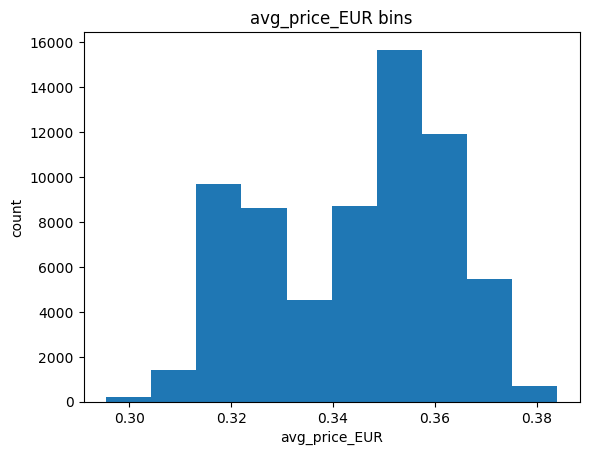

In [69]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["avg_price_EUR"])

# set x/y labels and plot title
plt.pyplot.xlabel("avg_price_EUR")
plt.pyplot.ylabel("count")
plt.pyplot.title("avg_price_EUR bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated)</code> function.</p>
<p>Since we want to include the minimum value of avg_price, we want to set <code>start_value = min(df["avg_price_EUR"])</code>.</p>
<p>Since we want to include the maximum value of avg_price, we want to set <code>end_value = max(df["avg_price_EUR"])</code>.</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so <code>numbers_generated = 4</code>.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [70]:
bins = np.linspace(min(df["avg_price_EUR"]), max(df["avg_price_EUR"]), 4)
bins

array([0.29542938, 0.32495161, 0.35447383, 0.38399605])

We set group  names:


In [71]:
group_names = ['avg_price_Low', 'avg_price_Medium', 'avg_price_High']

We apply the function "cut" to determine what each value of `df['avg_price_EUR']` belongs to.

In [72]:
df['avg_price-binned'] = pd.cut(df['avg_price_EUR'], bins, labels=group_names, include_lowest=True )
df[['avg_price_EUR','avg_price-binned']].head()

,avg_price_EUR,avg_price-binned
0,0.340,avg_price_Medium
1,0.339,avg_price_Medium
2,0.338,avg_price_Medium
3,0.338,avg_price_Medium
4,0.339,avg_price_Medium


Let's see the number of vehicles in each bin:


In [73]:
df["avg_price-binned"].value_counts()

avg_price_Medium    25707
avg_price_High      24859
avg_price_Low       16345
Name: avg_price-binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'avg_price bins')

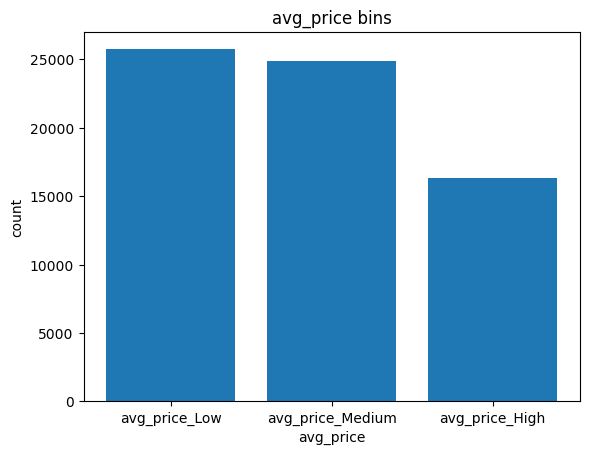

In [74]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["avg_price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("avg_price")
plt.pyplot.ylabel("count")
plt.pyplot.title("avg_price bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "avg_price" based on 3 categories ("avg_price_Low", "avg_price_Medium" and "avg_price_High"). 
</p>

<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'avg_price bins')

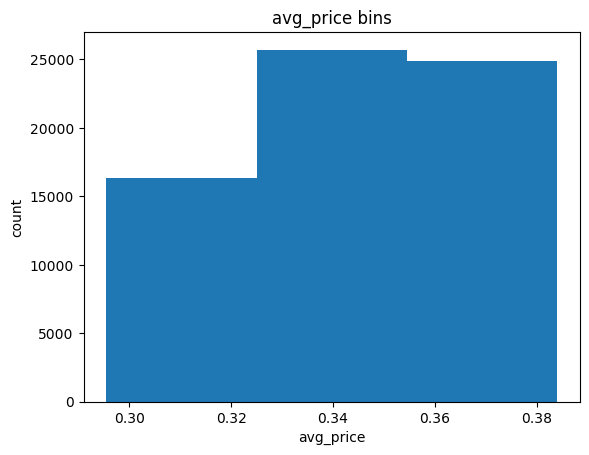

In [75]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "avg_price_EUR" with bins = 3
plt.pyplot.hist(df["avg_price_EUR"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("avg_price")
plt.pyplot.ylabel("count")
plt.pyplot.title("avg_price bins")

The plot above shows the binning result for the attribute "avg_price_EUR".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "avg_price-binned" has three unique values: "avg_price_Low", "avg_price_Medium" or "avg_price_High". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "avg_price-binned" to indicator variables.
</p>

<p>
    We will use pandas method <code>get_dummies()</code> to assign numerical values to different categories of avg_price. 
</p>


Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [76]:
dummy_variable_1 = pd.get_dummies(df["avg_price-binned"])
dummy_variable_1

,avg_price_Low,avg_price_Medium,avg_price_High
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In the dataframe, column 'volume-binned' has values for 'avg_price_Low', 'avg_price_Medium' and 'avg_price_High' as 0s and 1s now.


In [77]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "avg_price-binned" from "df"
df.drop("avg_price-binned", axis = 1, inplace=True)
df

,ts,rec_count,open_USDT,high_USDT,low_USDT,close_USDT,volume_USDT,avg_price_EUR,avg_price_Low,avg_price_Medium,avg_price_High
0,2022-11-11 14:38:00,47,0.887,0.884,0.501,0.489,165726.4,0.340,0,1,0
1,2022-11-11 14:39:00,49,0.883,0.881,0.493,0.489,235942.4,0.339,0,1,0
2,2022-11-11 14:40:00,46,0.882,0.880,0.487,0.490,475118.5,0.338,0,1,0
3,2022-11-11 14:41:00,53,0.880,0.881,0.486,0.490,420195.5,0.338,0,1,0
4,2022-11-11 14:42:00,42,0.883,0.881,0.492,0.480,199091.6,0.339,0,1,0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "ts" specifying month
</div>


<i>Note:</i> for obtaining month data use <code>dataframe.dt.month</code> method.

In [84]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# get indicator variables of month data and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['ts'].dt.month)

# show first 5 instances of data frame "dummy_variable_2"
dummy_variable_2.head()

```

</details>


<h2 id="resampling">Resampling</h2>
<b>What is a resampling?</b>
<p>
    Resampling is a crucial method for time series analysis that enables you to freely choose the desired level of data resolution. You can either upsample, or increase the number of data points, such as by transforming 5-minute data into 1-minute data. 
</p>
<p>
    The basic syntax for resampling in Pandas is <code>dataframe.resample('desired resolution')</code> method. Along with that, different aggregation function can be used.
</p>
<p>
    Start by downsampling the series from 1 minute into 10-minute bins. First we need to set an index to "ts" column. Considering the semantics of our dataset, for the column "open_USDT" we take the first value of a 10-minute interval, while for 'close_USDT' we have last value; for 'high_USDT' maximum value within a 10-minute interval is taken, in accordance for 'low_USDT' we take minimum value. Column 'volume_USDT' will store all summed-up values within a 10-minute interval.
</p>

In [79]:
df.index = df['ts']
df.loc[:, 'open_USDT':'volume_USDT'].resample("10min").agg({
    'open_USDT': 'first',
    'high_USDT': 'max',
    'low_USDT': 'min',
    'close_USDT': 'last',
    'volume_USDT': 'sum'
}).head()

,open_USDT,high_USDT,low_USDT,close_USDT,volume_USDT
ts,,,,,
2022-11-11 14:30:00,0.887,0.884,0.493,0.489,4.017e+05
2022-11-11 14:40:00,0.882,0.920,0.486,0.586,9.127e+06
2022-11-11 14:50:00,0.906,0.905,0.535,0.569,5.262e+06
2022-11-11 15:00:00,0.901,0.903,0.528,0.518,4.136e+06
2022-11-11 15:10:00,0.890,0.895,0.527,0.554,2.648e+06


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Similar to before, downsample the series into 45 minute bins.</b>

</div>

In [85]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# downsample the series into 45 minute bins.
df.loc[:, 'open_USDT':'volume_USDT'].resample("45min").agg({
    'open_USDT': 'first',
    'high_USDT': 'max',
    'low_USDT': 'min',
    'close_USDT': 'last',
    'volume_USDT': 'sum'
})
```

</details>

<h2 id="save">Save Dataset</h2>

In [ ]:
df.to_csv('clean_df.csv')

Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
